**SUBMITTED BY** - MOHD SAIF

Problem statement
 
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings. 


In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/module 1/EDA Hotel Booking Analysis/Hotel Bookings.csv'
df=pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#finding out null
null_values=df.isnull().sum()
sorted_null=null_values.sort_values(ascending=False)
sorted_null.head(15)

company                        112593
agent                           16340
country                           488
children                            4
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
hotel                               0
previous_cancellations              0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [ ]:
#removing the 'company'column as it has too many null values as compared to other columns
df.drop(['company'],axis=1,inplace=True)

In [ ]:
#replacing null values in agent,country and children column to zero
df[['country','children','agent']]=df[['country','children','agent']].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:


#EXPLORATORY DATA ANALYSIS



In [ ]:
#COMPARING THE TYPE OF HOTEL USED 

hotel_type=df['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

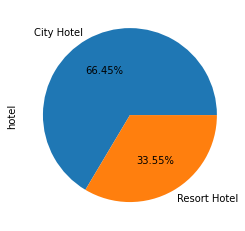

In [ ]:
hotel_type.plot.pie(autopct='%.2f%%')

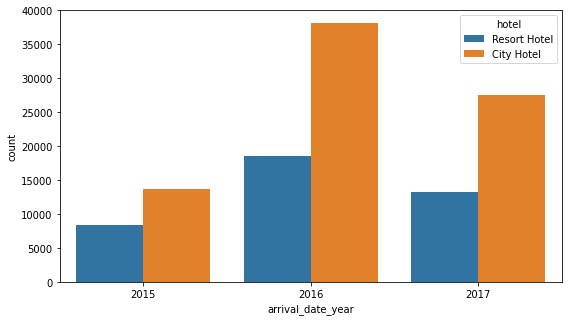

In [ ]:
#HOTEL type USED YEAR WISE

plt.subplots(figsize=(9,5))
sns.countplot(x='arrival_date_year', hue='hotel',data=df);

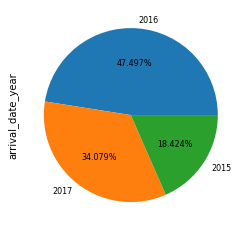

In [ ]:
yearwise=df.arrival_date_year.value_counts()
yearwise.plot.pie(figsize=(10,4),fontsize=8, autopct="%.3f%%")

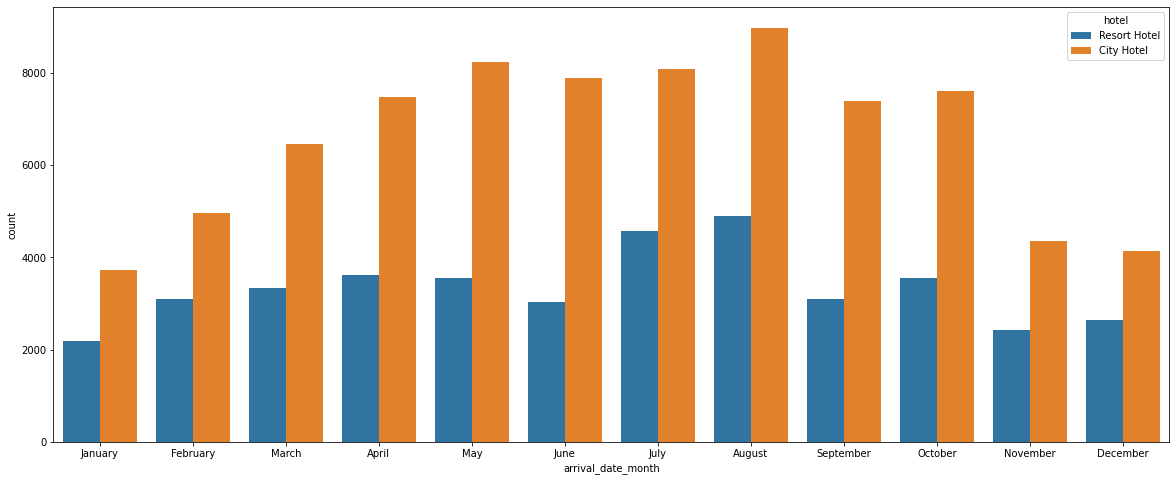

In [ ]:
#MONTHLY BOOKING COMPARISION HOTELWISE

plt.subplots(figsize=(20,8))
sns.countplot(x='arrival_date_month',hue='hotel',order=order_month,data=df);

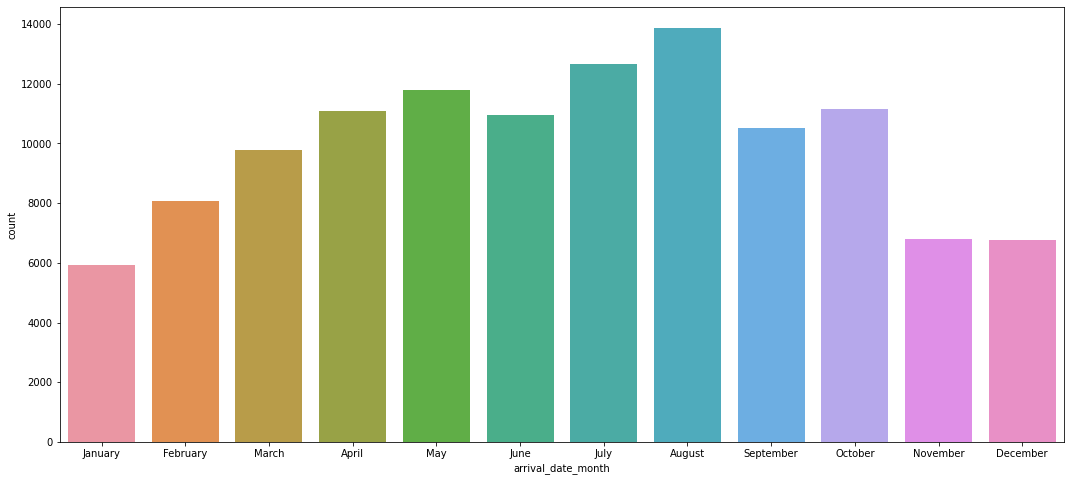

In [ ]:
#MONTHLY COMPARISION

plt.subplots(figsize=(18,8))
order_month=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x='arrival_date_month',order=order_month, data=df);





Text(0.5, 0, 'month')

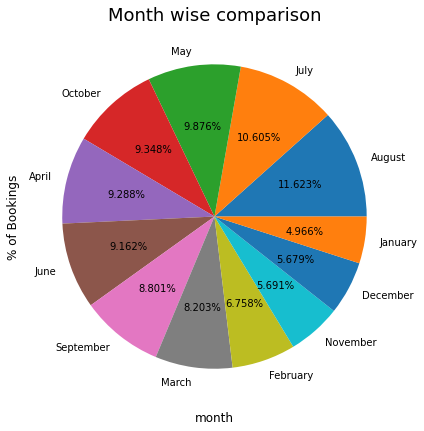

In [ ]:
month_counts = df['arrival_date_month'].value_counts()
month_counts.plot.pie(figsize = (14,7),fontsize = 10, autopct="%.3f%%")
plt.title('Month wise comparison',fontsize = 18)
plt.ylabel('% of Bookings',fontsize = 12)
plt.xlabel('month',fontsize=12)

In [ ]:
#country wise guests 

guests=df[df['is_canceled']==0]['country'].value_counts()
guests

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

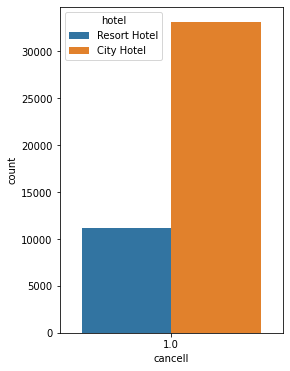

In [ ]:
#cancellation 
df['cancell']= df[df['is_canceled']!=0]['is_canceled']

plt.subplots(figsize=(4,6))
sns.countplot(x='cancell' ,hue='hotel',data=df)

            

In [ ]:
#Total number of cancelled bookings
df[df['is_canceled']!=0]['hotel'].count()

44224

In [ ]:
cancelled_monthly= df.groupby('arrival_date_month')['cancell'].count().reset_index()
df3= pd.DataFrame(cancelled_monthly)

df3.columns=['Month','Cancellations']


df3['Month']=pd.Categorical(df3['Month'],categories=order_month, ordered=True)
df3=df3.sort_values('Month').reset_index()
df3.drop(['index'],axis=1)


,Month,Cancellations
0,January,1807
1,February,2696
2,March,3149
3,April,4524
4,May,4677
5,June,4535
6,July,4742
7,August,5239
8,September,4116
9,October,4246


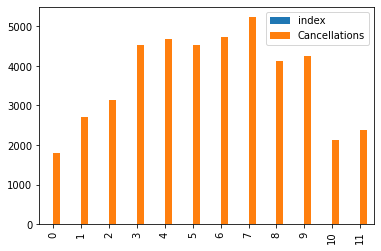

In [ ]:
df3.plot(kind='bar')


In [ ]:
#Number of guests with babies

baby_count=df[df['babies']!=0]['babies'].
baby_count

917

Text(0.5, 0, 'monthwise')

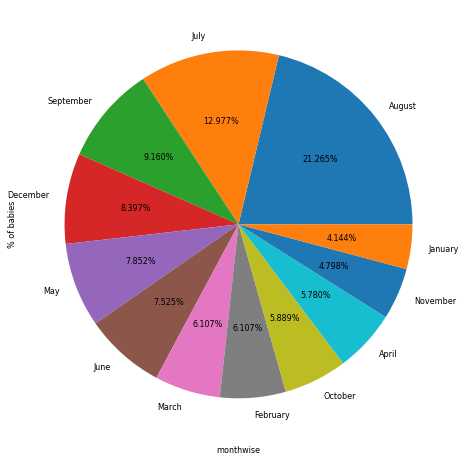

In [ ]:
x=df[df['babies']!=0]['arrival_date_month'].value_counts()
x.plot.pie(figsize=(15,8),fontsize=8,autopct="%.3f%%")
plt.ylabel("% of babies",fontsize=8)
plt.xlabel("monthwise",fontsize=8)

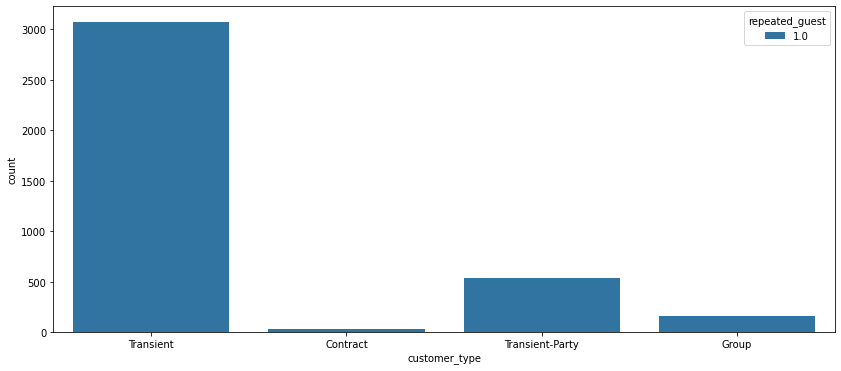

In [ ]:
#Repeated clients
plt.subplots(figsize=(14,6))
df['repeated_guest']=df[df['is_repeated_guest']!=0]['is_repeated_guest']
sns.countplot(x='customer_type',hue='repeated_guest',data=df)

In [ ]:
#finding the months with most number of repeating clients
month_guest=df.groupby('arrival_date_month')['repeated_guest'].count().reset_index()
df4=pd.DataFrame(month_guest)
df4.columns=['month','repeating clients']
df4['month']=pd.Categorical(df4['month'],categories=order_month, ordered=True)
df4=df4.sort_values('month').reset_index()


df4.drop(['index'],axis=1)

,month,repeating clients
0,January,397
1,February,411
2,March,426
3,April,283
4,May,366
5,June,282
6,July,301
7,August,223
8,September,201
9,October,313


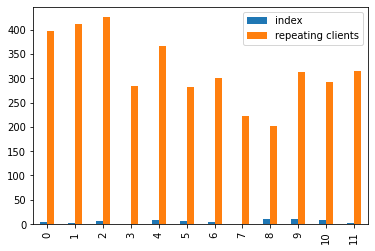

In [ ]:
df4.plot(kind='bar')


In [ ]:
#Night Stays

weekends=df.groupby('hotel').agg({'stays_in_weekend_nights':'sum','stays_in_week_nights':'sum'})
weekends




,stays_in_weekend_nights,stays_in_week_nights
hotel,,
City Hotel,63082,173174
Resort Hotel,47664,125337


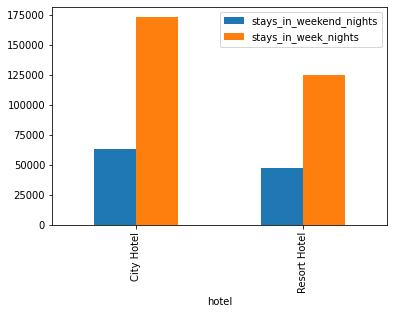

In [ ]:
weekends.plot(kind='bar')

we ca say that city hotel accomodates more working people asduring week nights people who are on work related affairs are found in city hotels.

[(0.0, 15.0)]

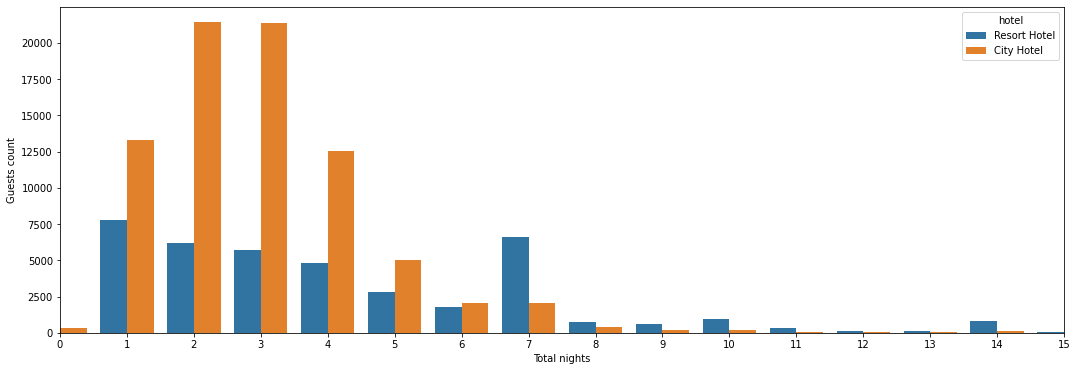

In [ ]:
#Long Stays
df['total_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']
plt.subplots(figsize=(18,6))
ax = sns.countplot(x="total_stay", hue = "hotel", data = df)
ax.set(xlabel="Total nights", ylabel = "Guests count")
ax.set(xlim=(0, 15))


In [ ]:
#market

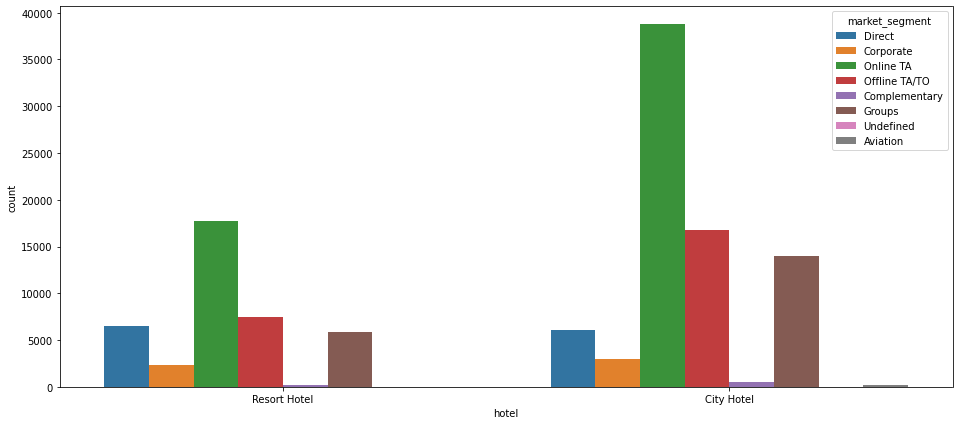

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='hotel',hue='market_segment',data=df)

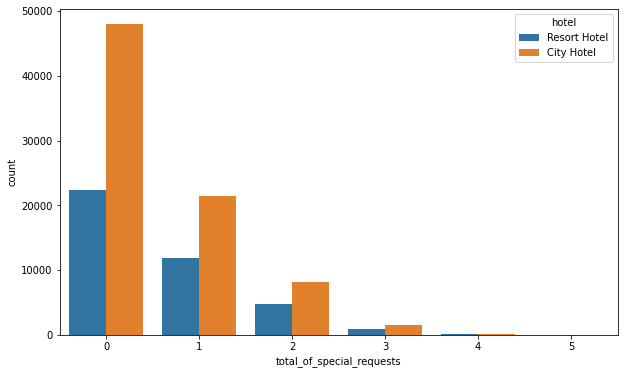

In [ ]:
#special requests


plt.subplots(figsize=(10,6))
sns.countplot(x='total_of_special_requests', hue='hotel',  data=df)

Text(0, 0.5, 'REQUESTS')

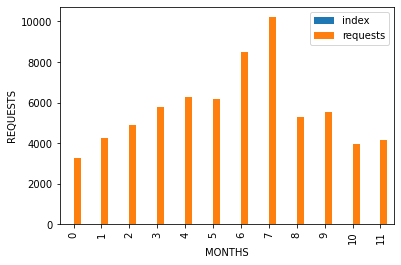

In [ ]:
special=df.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()

df5= pd.DataFrame((special))


 
df5.columns=['Month','requests']

 
 
 
df5['Month']=pd.Categorical(df5['Month'],categories=order_month, ordered=True)
df5=df5.sort_values('Month').reset_index()




df5.plot(kind='bar')
plt.xlabel('MONTHS')
plt.ylabel('REQUESTS')


# **Conclusion**

CITY HOTELS have more bookings(66.45%) 



2016 has most number of bookings(47.5%), which went down to 34.1% in the year 2017

The month of August has most number of guests 11.62% , the second quarter Q2 and the third quarter Q3 has most number of bookings.

Most guests are from Portugal and then from United Kingdom.

City hotels has more cancellations.

Most cancellations take place in the second and third quarters.

Q3 has most number of babies among guests.

Repeated guests percentage is more for City Hotel,most of them are transient types.

The month of January , february and march i.e. Q1 has most numbers of repeated guests.

City Hotels accomodate more guests who stay for week nights.

For longer stays (i.e. days>6) people tend to prefer Resort hotels, For Short stay people choose City Hotel.


Online Booking is the biggest medium of Hotel Booking.

Most number of special requests are in moth of july and august. Number of special requests for City Hotel is higher than Resort Hotel.

### **Suggestions**

During Q3 Hotels should arrange for a doctor and baby care items for better service.

In Q2 and Q3 the bookings are the most,therefore staff should be in full strength in these quarters. 

Hotels can put forward some discount offers in Q1 and Q4 as Bookings rate is less.

In Q3 hotels can hire part time or contract based staff as the rush is more in this quarter.

Hotels can promote their business online via social media channels and hiring influencers as most of the Bookings are coming from online portals.

Repeated guests should be given a priority pass or made the member of some of priority group with perks , to retain them. Since they are mostly in Q1 which is winters , they can be given complementary hot drinks.

City Hotel should give concessions for people staying for more than 6 days.

Resort hotels can give complementary goodies and services (like free cabs,etc) for boosting the short stays.
